# G2M Cab Analysis Data Glacier - Navodith Shankar


Importing and reading datasets

In [1]:
#imports
import datetime
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#read all files
cabDT = pd.read_csv('C:/Users/fazen/Desktop/DataSets-main/DataSets-main/Cab_Data.csv')
cabDT


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
cityDT = pd.read_csv('C:/Users/fazen/Desktop/DataSets-main/DataSets-main/City.csv')
cityDT

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [4]:
customerIdDT = pd.read_csv('C:/Users/fazen/Desktop/DataSets-main/DataSets-main/Customer_ID.csv')
customerIdDT

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [5]:
transcIdDT = pd.read_csv('C:/Users/fazen/Desktop/DataSets-main/DataSets-main/Transaction_ID.csv')
transcIdDT

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [6]:
cabDT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [7]:
cabDT.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [8]:
cityDT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


Convert to proper object types

In [9]:
#To continue we need to change the Dtype of Population and Users to int32 to perform analysis
cityDT['Users']=cityDT['Users'].replace('"', '')
cityDT['Population']=cityDT['Population'].replace('"', '')

#change type to int 32 bits
cityDT['Users']=cityDT['Users'].replace(',', '', regex=True).astype(int)
cityDT['Population']=cityDT['Population'].replace(',', '', regex=True).astype(int)

Finding how much of the population are actual users in terms of %

In [10]:
#Now we need to find out the most popular city using the population. Percentage will also show how much of the population are users
cityDT['User %'] = (cityDT['Users']/cityDT['Users'].sum()) * 100
city = (cityDT['Users']/cityDT['Users'].sum()) * 100
cityDT

#The results will show the percent of population from the 19 cities which tells us which city has the most users.

,City,Population,Users,User %
0,NEW YORK NY,8405837,302149,23.414907
1,CHICAGO IL,1955130,164468,12.745377
2,LOS ANGELES CA,1595037,144132,11.169447
3,MIAMI FL,1339155,17675,1.369717
4,SILICON VALLEY,1177609,27247,2.111495
5,ORANGE COUNTY,1030185,12994,1.006964
6,SAN DIEGO CA,959307,69995,5.424232
7,PHOENIX AZ,943999,6133,0.475274
8,DALLAS TX,942908,22157,1.717047
9,ATLANTA GA,814885,24701,1.914193


Pie and bar chart illustrates each cities population

<AxesSubplot: title={'center': 'Population Diversity'}, ylabel='Population'>

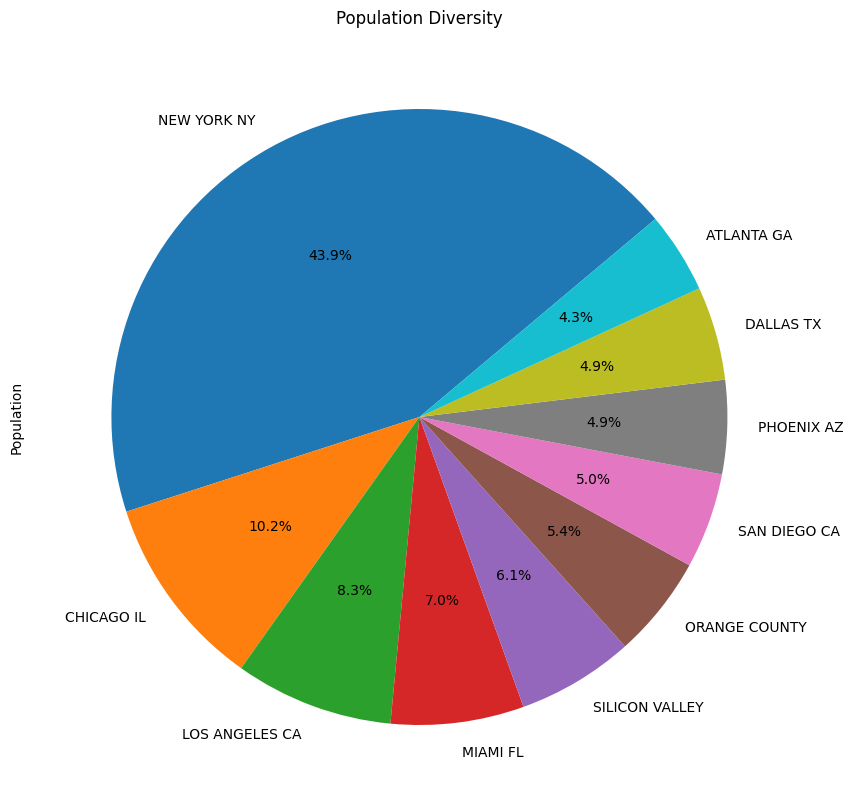

In [11]:
plt.title("Population Diversity")
cityDT.groupby("City")["Population"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

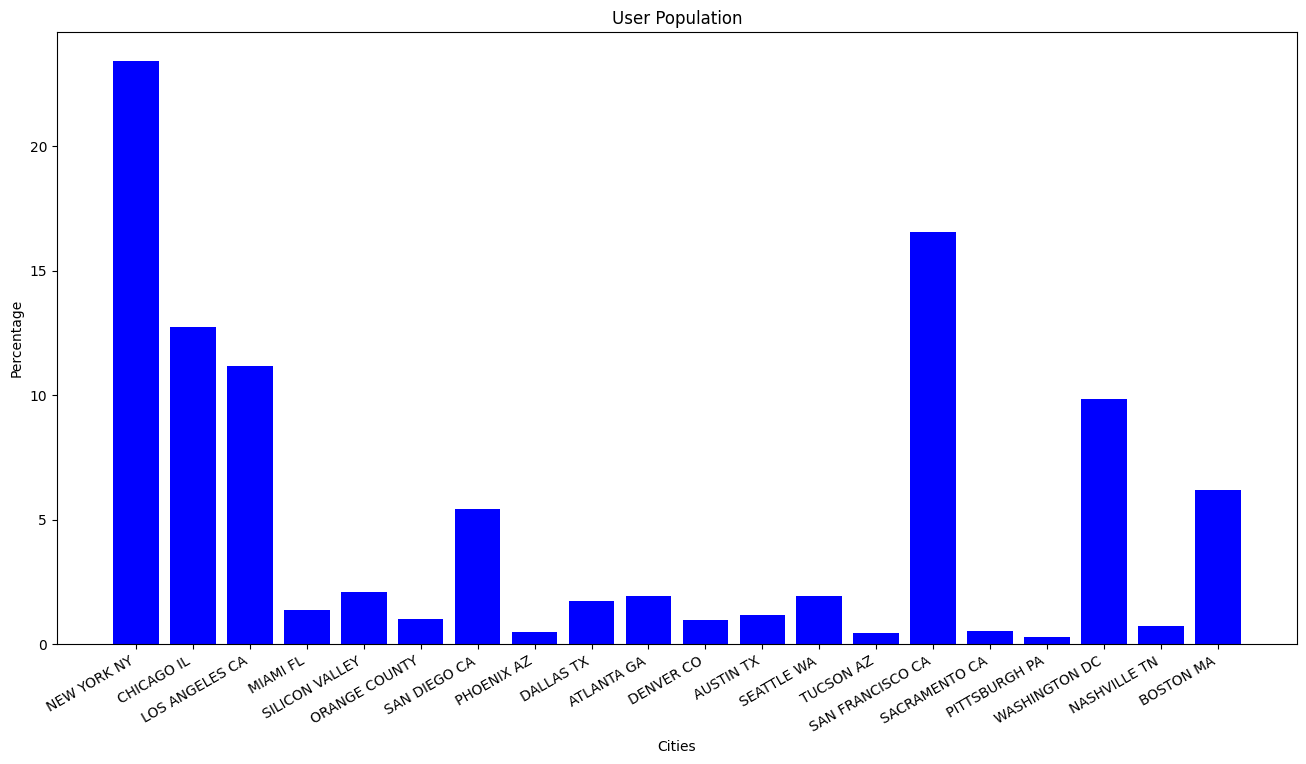

In [12]:
citY = cityDT['City']
plt.figure(figsize = (16, 9))
plt.bar(citY, city, color = 'blue')
plt.gcf().autofmt_xdate()
plt.title('User Population')
plt.ylabel('Percentage')
plt.xlabel('Cities')
plt.show()

<h1 style = "font-size:1.5rem;color:black,"> After creating a bar chart, we can conclude that New York, San Francisco, Washington DC are the top 3 cities</h1>

In [13]:
cabDT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [14]:
cabDT.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Date of Travel,359392.0,4.296407e+04,307.467197,42371.0,4.269700e+04,42988.00,4.323200e+04,43465.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [15]:
cabDT['Company']

0           Pink Cab
1           Pink Cab
2           Pink Cab
3           Pink Cab
4           Pink Cab
             ...    
359387    Yellow Cab
359388    Yellow Cab
359389    Yellow Cab
359390    Yellow Cab
359391    Yellow Cab
Name: Company, Length: 359392, dtype: object

In [16]:
cabDT['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [17]:
transcIdDT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [18]:
transcIdDT.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


In [19]:
transcIdDT

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [20]:
transCabDT = pd.merge(transcIdDT, cabDT, on=["Transaction ID"])
transCabDT
#Merge cabDT and transcIdDT to find the correlation between them, next we will merge all datasets together

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,53286,Cash,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,52265,Cash,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,52175,Card,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [21]:
transCabDT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Customer ID     359392 non-null  int64  
 2   Payment_Mode    359392 non-null  object 
 3   Date of Travel  359392 non-null  int64  
 4   Company         359392 non-null  object 
 5   City            359392 non-null  object 
 6   KM Travelled    359392 non-null  float64
 7   Price Charged   359392 non-null  float64
 8   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 27.4+ MB


Combine Transaction, Customer, City and Cab Data datasets together

In [22]:
DataMerge = cabDT.merge(transcIdDT, on= 'Transaction ID').merge(customerIdDT, on ='Customer ID').merge(cityDT, on = 'City')
DataMerge

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,User %
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,1.914193
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,1.914193
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,1.914193
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,1.914193
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,1.914193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,9.841888
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,9.841888
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,9.841888
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,9.841888


In [23]:
DataMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int32  
 13  Users               359392 non-null  int32  
 14  User %              359392 non-null  float64
dtypes: float64(4), int32(2), int64(5),

This chart illustrates the most popular distance travelled among both cabs

Text(0, 0.5, 'frequency')

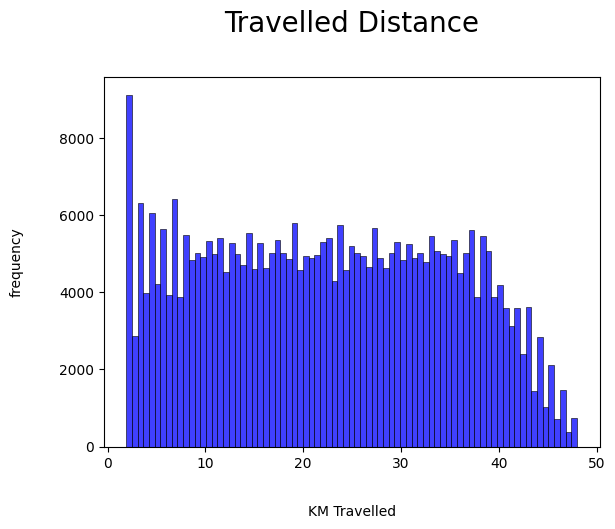

In [24]:
sb.histplot(DataMerge['KM Travelled'], kde=False, color='blue')
plt.title("Travelled Distance", fontsize=20, y=1.1)
plt.xlabel("KM Travelled", labelpad=25)
plt.ylabel("frequency", labelpad=25)


<h1 style = "font-size:1.5rem;color:black,">The result concluded from this is that 2 km is the most popular ride</h1>

In [25]:
#Separate PinkCab and YellowCab columns
PinkCab = cabDT[cabDT['Company']=='Pink Cab']
YellowCab = cabDT[cabDT['Company']=='Yellow Cab']

In [26]:
PinkPrice = PinkCab['Price Charged']
YellowPrice = YellowCab['Price Charged']

This plot illustrates which method of payment is most popular between the two cabs

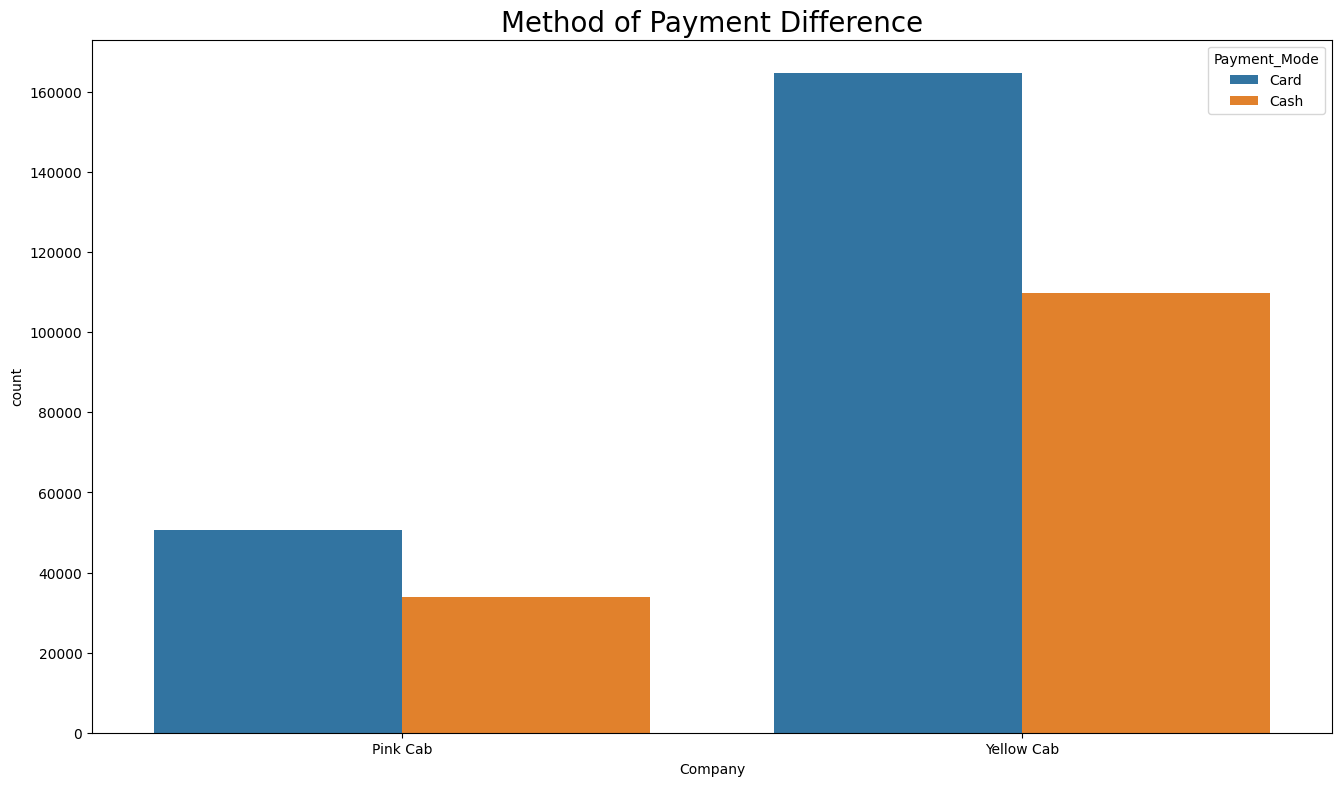

In [27]:
plt.figure(figsize = (16, 9))
sb.countplot(x="Company", hue="Payment_Mode", data=DataMerge)
plt.title('Method of Payment Difference', fontsize=20)
plt.show()

In [28]:
PinkCab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
...,...,...,...,...,...,...,...
357449,10437610,43106,Pink Cab,WASHINGTON DC,13.56,184.19,135.600
357450,10437611,43465,Pink Cab,WASHINGTON DC,29.68,388.08,302.736
357451,10437612,43107,Pink Cab,WASHINGTON DC,28.50,369.04,310.650
357452,10437614,43102,Pink Cab,WASHINGTON DC,16.10,194.17,162.610


In [29]:
PinkCab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 357453
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  84711 non-null  int64  
 1   Date of Travel  84711 non-null  int64  
 2   Company         84711 non-null  object 
 3   City            84711 non-null  object 
 4   KM Travelled    84711 non-null  float64
 5   Price Charged   84711 non-null  float64
 6   Cost of Trip    84711 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 5.2+ MB


With these two charts, we can see the amount of money the cabs tend to charge the most after a ride. The first chart shows the Pink cab and the second chart shows the Yellow cab.

Text(0, 0.5, 'Frequency')

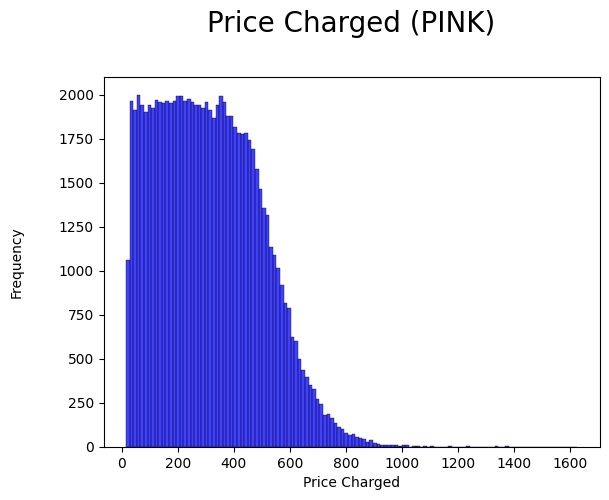

In [30]:
sb.histplot(PinkCab['Price Charged'],kde=False, color='blue')
plt.title("Price Charged (PINK)", fontsize=20, y=1.1)
plt.ylabel("Frequency", labelpad=25)


Text(0, 0.5, 'Frequency')

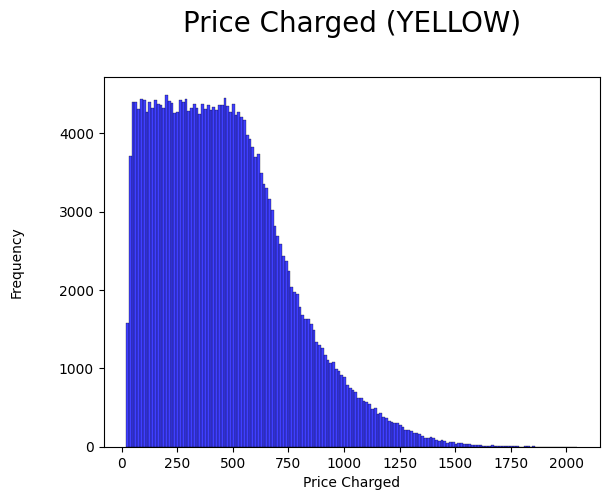

In [31]:
sb.histplot(YellowCab['Price Charged'],kde=False, color='blue')
plt.title("Price Charged (YELLOW)", fontsize=20, y=1.1)
plt.ylabel("Frequency", labelpad=25)

These two charts show the most popular cost of trip. First chart illustrates Pink cabs results and the second chart illustrates the Yellow cabs results

Text(0, 0.5, 'Frequency')

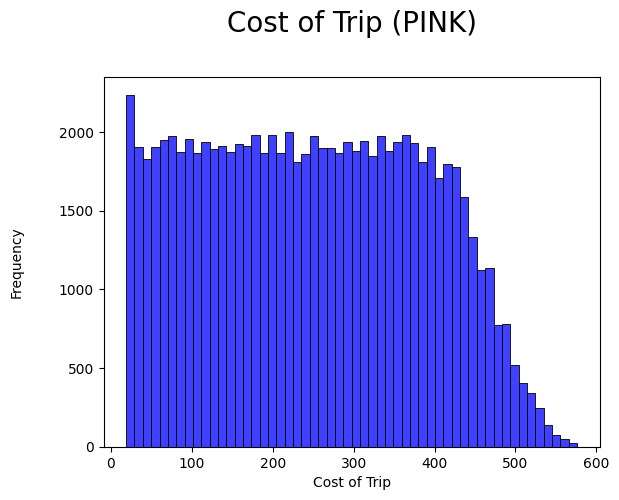

In [32]:
sb.histplot(PinkCab['Cost of Trip'],kde=False, color='blue')
plt.title("Cost of Trip (PINK)", fontsize=20, y=1.1)
plt.ylabel("Frequency", labelpad=25)

Text(0, 0.5, 'Frequency')

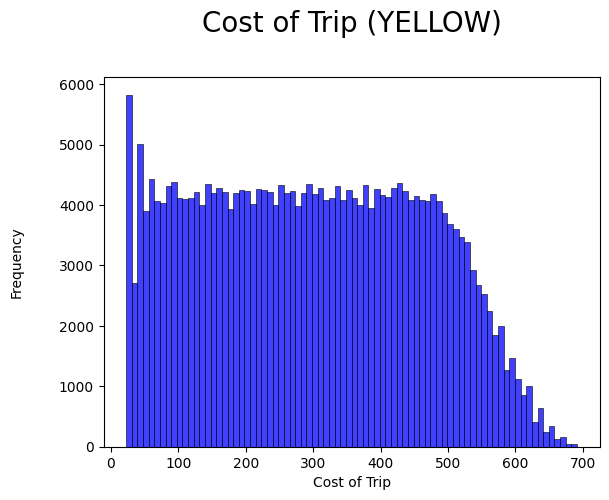

In [33]:
sb.histplot(YellowCab['Cost of Trip'],kde=False, color='blue')
plt.title("Cost of Trip (YELLOW)", fontsize=20, y=1.1)
plt.ylabel("Frequency", labelpad=25)

The plot below shows which gender is most popular among the two cabs

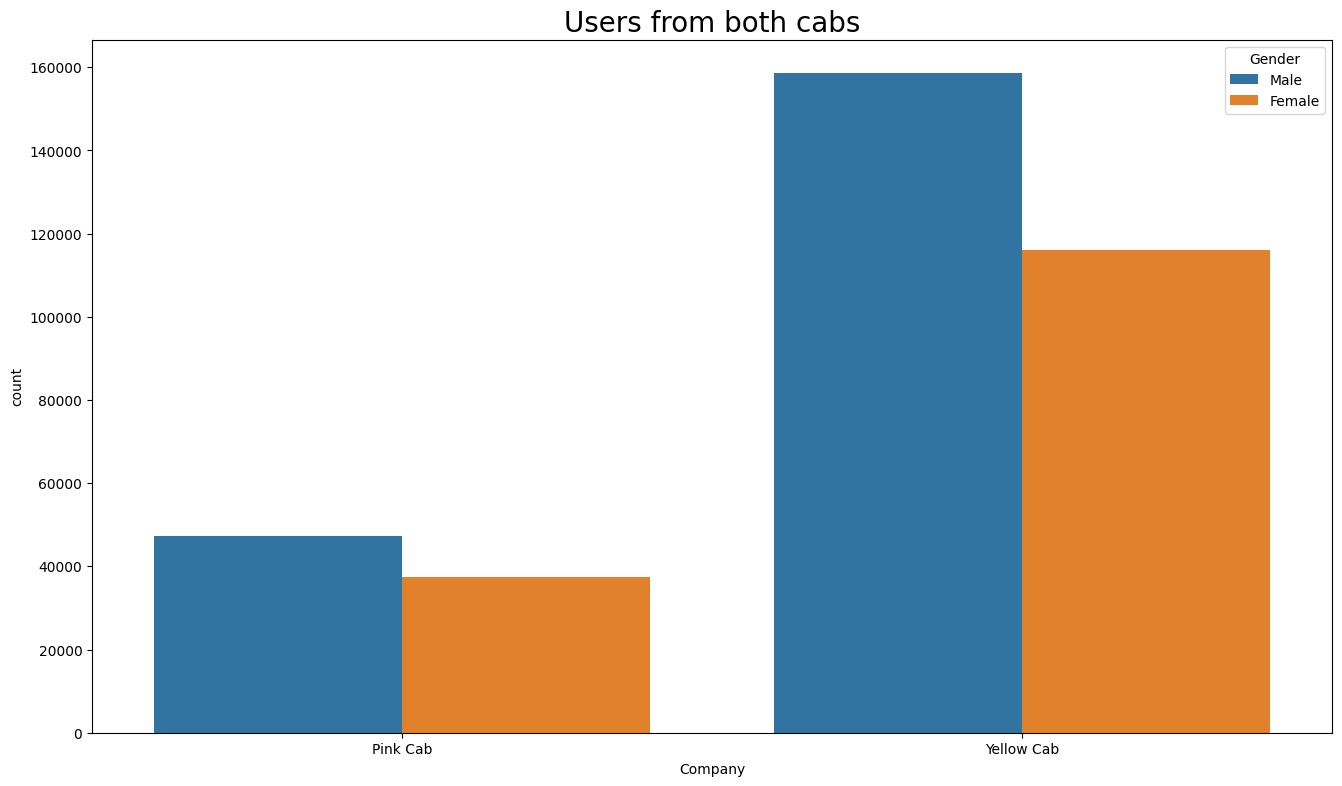

In [34]:
plt.figure(figsize = (16, 9))
sb.countplot(x="Company", hue="Gender", data=DataMerge)
plt.title('Users from both cabs', fontsize=20)
plt.show()

Convert 'Date of Travel' to real dates using datetime and include profit/margin column in the merged dataset

In [35]:
DataMerge['Date of Travel'] = DataMerge['Date of Travel'].apply(lambda x: datetime.date(1899, 12, 30)+datetime.timedelta(days=x))
DataMerge['Date of Travel'] = pd.to_datetime(DataMerge['Date of Travel'], infer_datetime_format=True)

cabDT['Date of Travel'] = cabDT['Date of Travel'].apply(lambda x: datetime.date(1899, 12, 30)+datetime.timedelta(days=x))
cabDT['Date of Travel'] = pd.to_datetime(cabDT['Date of Travel'], infer_datetime_format=True)

DataMerge['Year'] = DataMerge['Date of Travel'].dt.year
DataMerge['Month'] = DataMerge['Date of Travel'].dt.month
DataMerge['Day of Week'] = DataMerge['Date of Travel'].dt.day_name()
DataMerge['Profit'] = DataMerge['Price Charged'] - DataMerge['Cost of Trip']

cabDT['Year'] = cabDT['Date of Travel'].dt.year
cabDT['Month'] = cabDT['Date of Travel'].dt.month
cabDT['Day of Week'] = cabDT['Date of Travel'].dt.day_name()
cabDT['Profit'] = cabDT['Price Charged'] - cabDT['Cost of Trip']


The chart below shows us which month is the most popular for the amount of rides. We can conclude that December is the most popular for both cabs

Text(0, 0.5, 'Frequency')

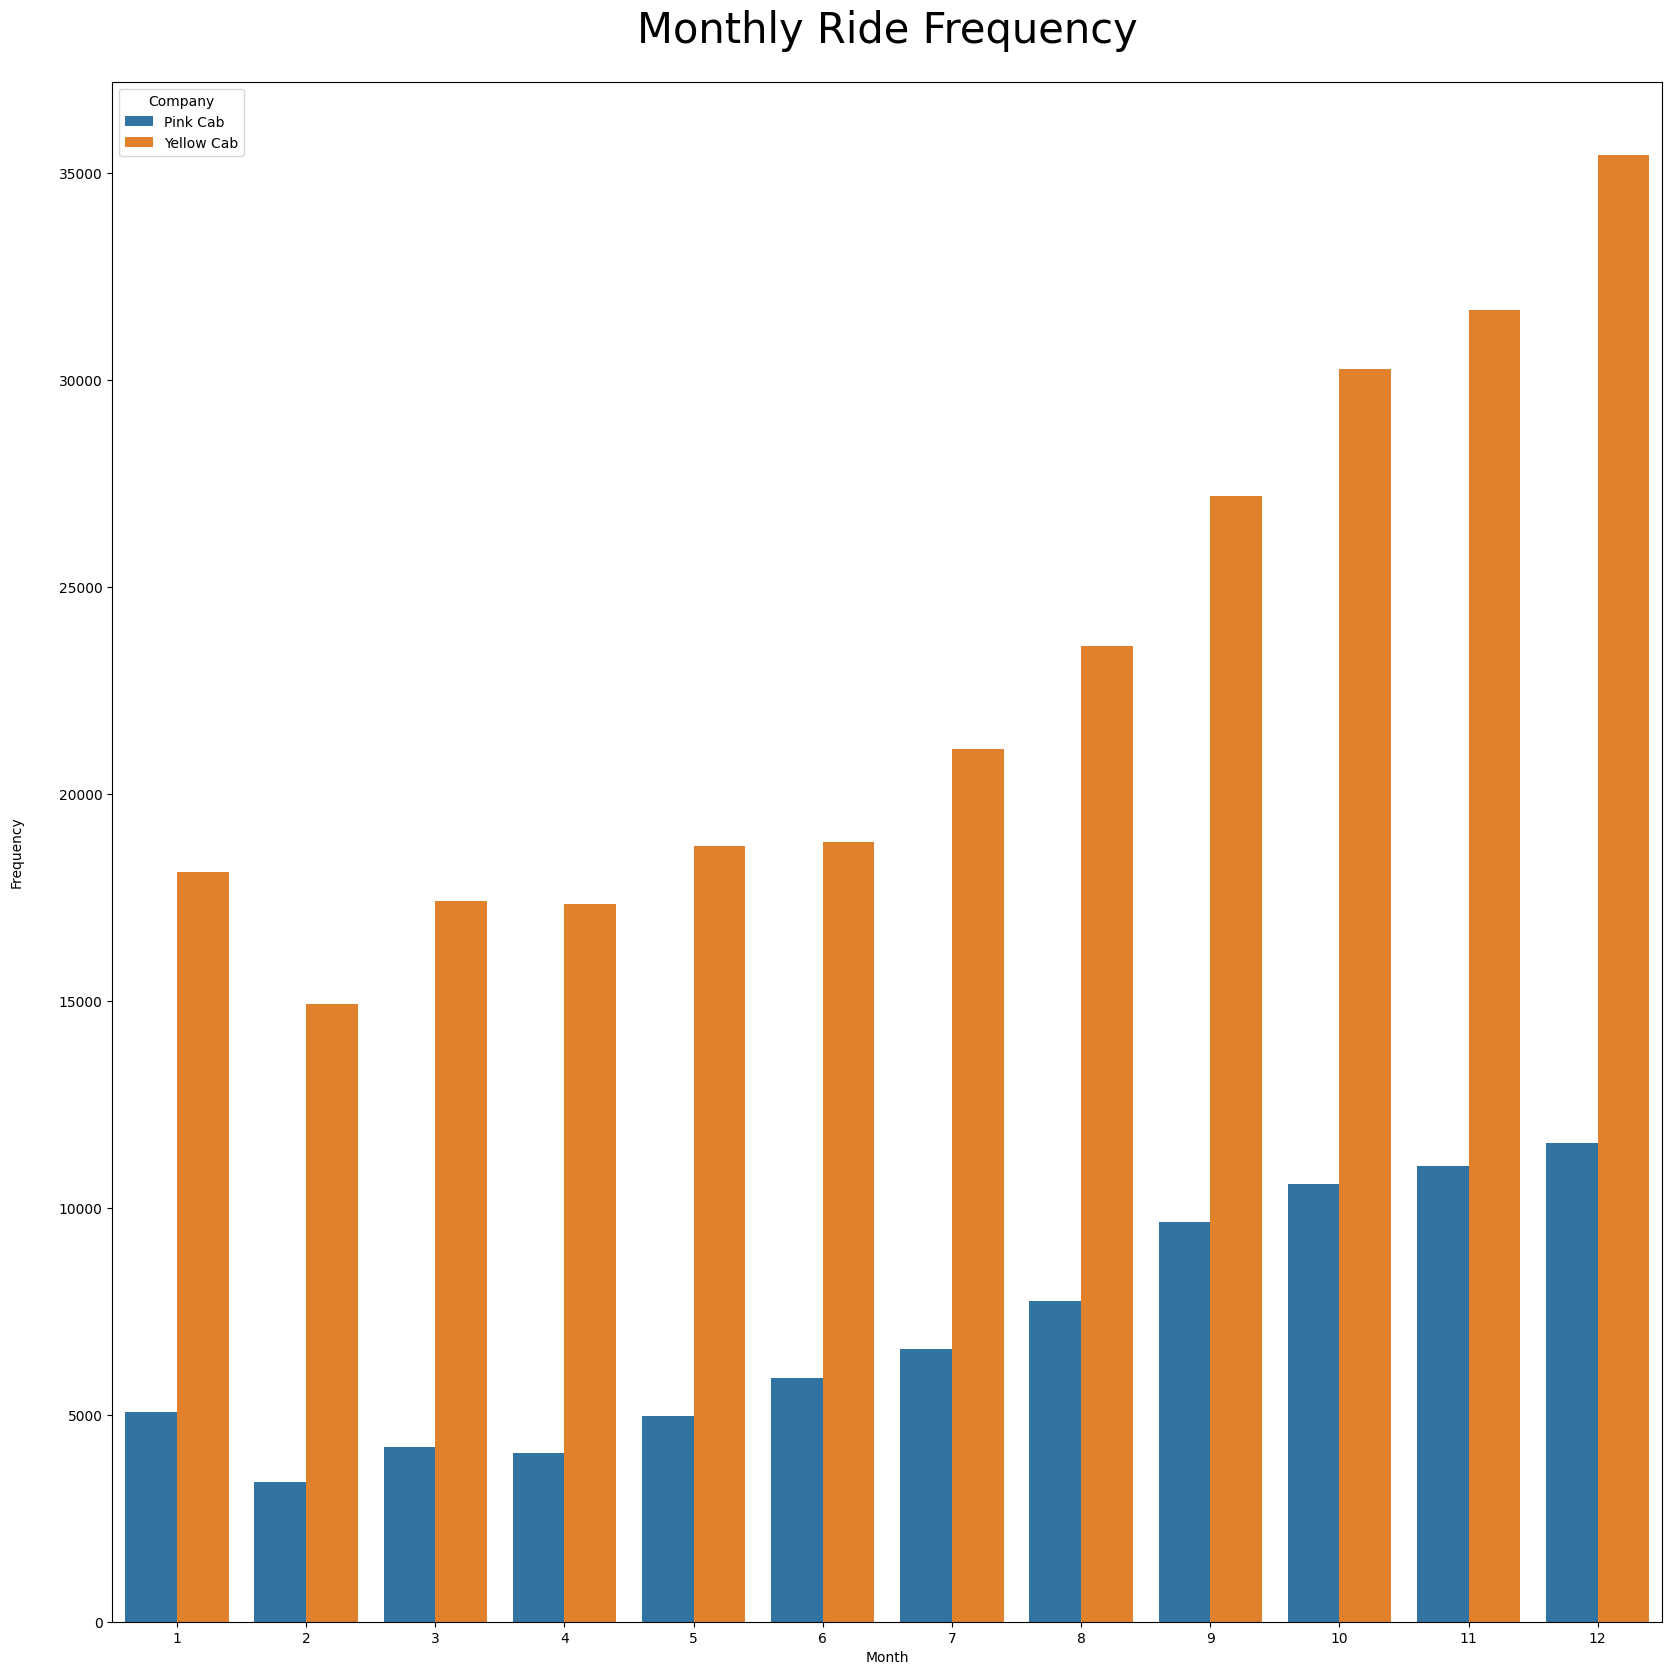

In [36]:
plt.figure(figsize=(20,20))
sb.countplot(x=cabDT['Month'],hue="Company",data=cabDT)
plt.title("Monthly Ride Frequency", fontsize=30, y=1.02)
plt.ylabel("Frequency", labelpad=25)

The plot below indicates the profit (%) per month with both cabs

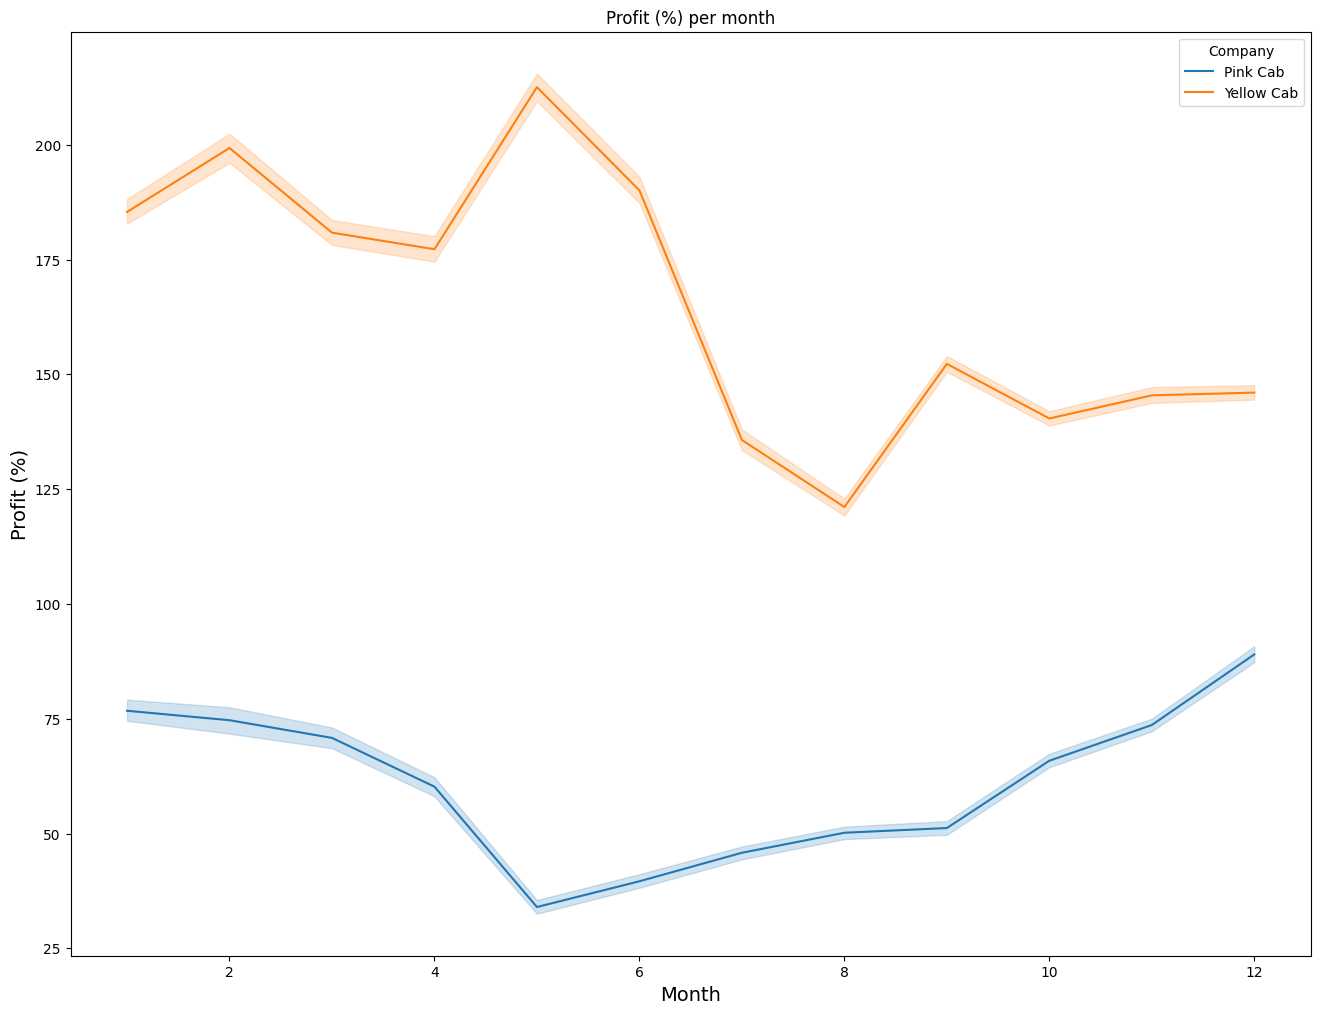

In [37]:
plt.figure(figsize = (16, 12))
sb.lineplot(x='Month', y='Profit', hue="Company", data=DataMerge, markers=True)
plt.xlabel("Month", size=14)
plt.ylabel("Profit (%)", size=14)
plt.title("Profit (%) per month")
plt.show()

To find out which city earns the most profit, the chart below indicates which city produced the most profit with both cabs. We can also identify the outliers with the 'Cost of Trip'

Text(0, 0.5, 'Price Charged')

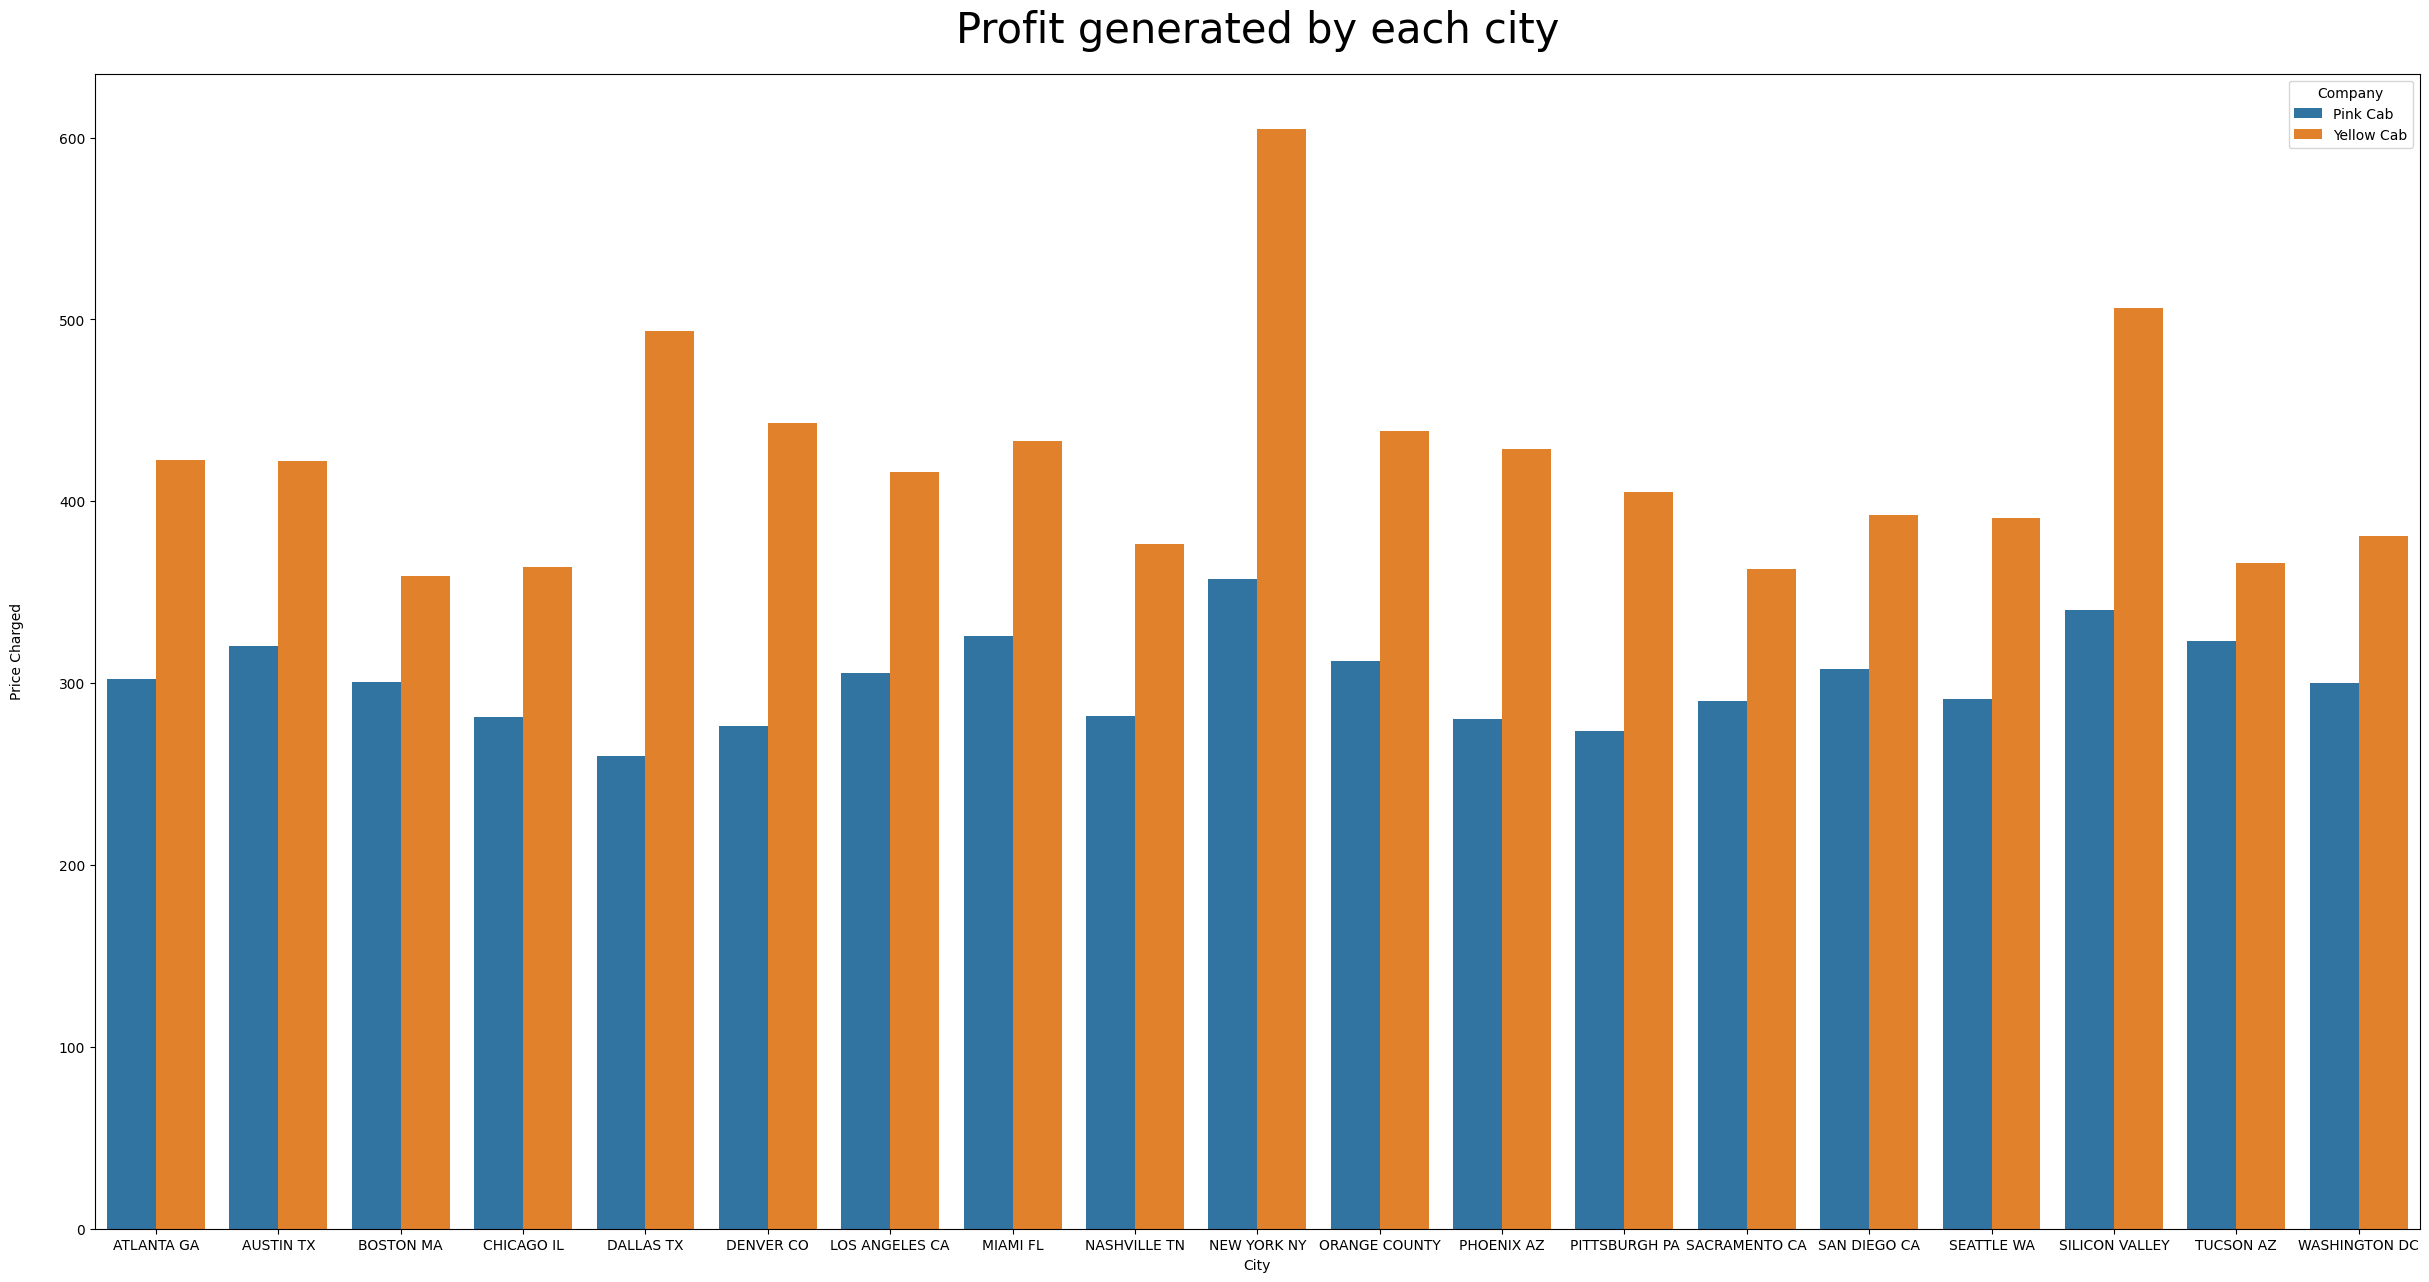

In [38]:
plt.figure(figsize=(30,15))
sb.barplot(x=cabDT['City'], y=cabDT['Price Charged'],hue="Company",data=cabDT, errorbar=None)
plt.title("Profit generated by each city", fontsize=30, y=1.02)
plt.ylabel("Price Charged", labelpad=25)

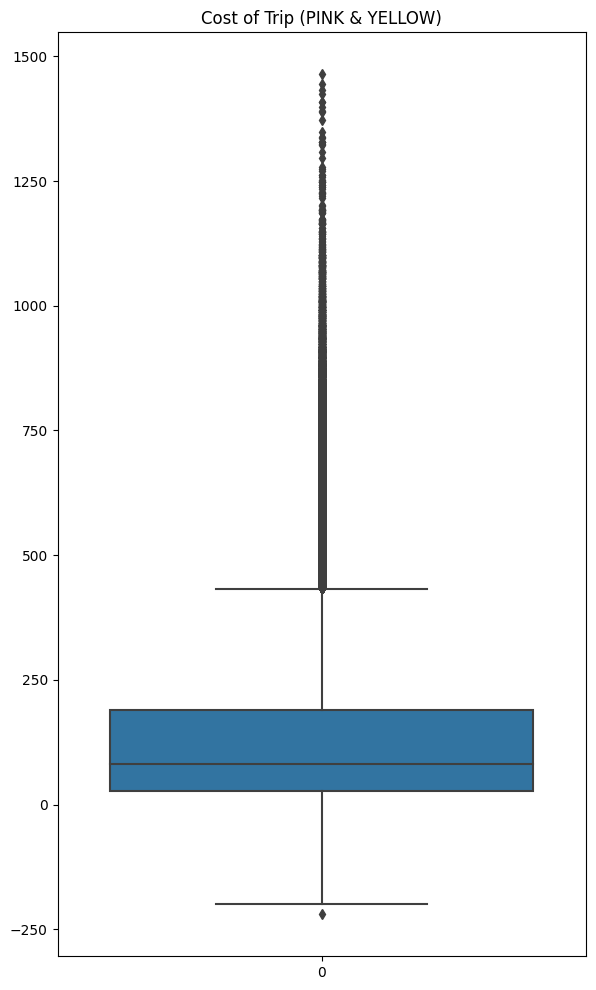

In [39]:
plt.figure(figsize=(15,12))
plt.subplot(1,2,2)
plt.title('Cost of Trip (PINK & YELLOW)')
sb.boxplot(cabDT['Profit'])
plt.show()

Outliers are detected

# Hypothesis Testing

H1: Age impacts the amount of Profit/Margin generated by a cab. There is a relation

In [40]:
a1 = DataMerge[(DataMerge.Age <= 50)&(DataMerge.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b1 = DataMerge[(DataMerge.Age >= 50)&(DataMerge.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
_, p_value = stats.ttest_ind(a1.values, b1.values, equal_var=True)

if(p_value<0.05):
    print('It is concluded there is a relation between Profit and Age in PINK Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Profit and Age in PINK Cab. Hypothesis is false')

It is concluded there is no relation between Profit and Age in PINK Cab. Hypothesis is false


In [41]:
a = DataMerge[(DataMerge.Age <= 50)&(DataMerge.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = DataMerge[(DataMerge.Age >= 50)&(DataMerge.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
_, p_value = stats.ttest_ind(a.values, b.values, equal_var=True)

if(p_value<0.05):
    print('It is concluded there is a relation between Profit and Age in YELLOW Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Profit and Age in YELLOW Cab. Hypothesis is false')

It is concluded there is a relation between Profit and Age in YELLOW Cab. Hypothesis is true


There is a relation between Profit and Age in Yellow Cab and not Pink Cab. If tested with 70 instead, both cabs indicate that there is no relation between Profit and Age.

H2: Gender impacts the amount of Profit/Margin generated by a cab. There is a relation

In [42]:
a = DataMerge[(DataMerge.Gender=='Female')&(DataMerge.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = DataMerge[(DataMerge.Gender=='Male')&(DataMerge.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('It is concluded there is a relation between Profit and Age in PINK Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Profit and Age in PINK Cab. Hypothesis is false')

It is concluded there is no relation between Profit and Age in PINK Cab. Hypothesis is false


In [43]:
a = DataMerge[(DataMerge.Gender=='Female')&(DataMerge.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = DataMerge[(DataMerge.Gender=='Male')&(DataMerge.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)

if(p_value<0.05):
    print('It is concluded there is a relation between Profit and Age in YELLOW Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Profit and Age in YELLOW Cab. Hypothesis is false')

It is concluded there is a relation between Profit and Age in YELLOW Cab. Hypothesis is true


In Pink cab there is not relation indicated but in Yellow cab there is a relationship indicated between Profit and Gender.

H3: The method of payment does not affect the Profit generated by a cab. There is no relation

In [44]:
a = DataMerge[(DataMerge.Payment_Mode=='Cash')&(DataMerge.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = DataMerge[(DataMerge.Payment_Mode=='Card')&(DataMerge.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('It is concluded there is a relation between Profit and Method of Payment in PINK Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Profit and Method of Payment in PINK Cab. Hypothesis is false')

It is concluded there is no relation between Profit and Method of Payment in PINK Cab. Hypothesis is false


In [45]:
a = DataMerge[(DataMerge.Payment_Mode=='Cash')&(DataMerge.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = DataMerge[(DataMerge.Payment_Mode=='Card')&(DataMerge.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('It is concluded there is a relation between Profit and Method of Payment in Yellow Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Profit and Method of Payment in Yellow Cab. Hypothesis is false')

It is concluded there is no relation between Profit and Method of Payment in Yellow Cab. Hypothesis is false


H4: Gender impacts the amount of KM travelled which results in the Profit changing. There is a relation

In [46]:
a = DataMerge[(DataMerge.Payment_Mode=='Female')&(DataMerge.Company=='Pink Cab')].groupby('KM Travelled').Profit.mean()
b = DataMerge[(DataMerge.Payment_Mode=='Male')&(DataMerge.Company=='Pink Cab')].groupby('KM Travelled').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('It is concluded there is a relation between Gender impacting KM Travelled which in the end changes the Profit in PINK Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Gender impacting KM Travelled which in the end does not change the Profit in PINK Cab. Hypothesis is false')

It is concluded there is no relation between Gender impacting KM Travelled which in the end does not change the Profit in PINK Cab. Hypothesis is false


In [47]:
a = DataMerge[(DataMerge.Payment_Mode=='Female')&(DataMerge.Company=='Yellow Cab')].groupby('KM Travelled').Profit.mean()
b = DataMerge[(DataMerge.Payment_Mode=='Male')&(DataMerge.Company=='Yellow Cab')].groupby('KM Travelled').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('It is concluded there is a relation between Gender impacting KM Travelled which in the end changes the Profit in Yellow Cab. Hypothesis is true')
else:
    print('It is concluded there is no relation between Gender impacting KM Travelled which in the end does not change the Profit in Yellow Cab. Hypothesis is false')

It is concluded there is no relation between Gender impacting KM Travelled which in the end does not change the Profit in Yellow Cab. Hypothesis is false


# Concluded Results

1) Yellow cab is more popular and generates more profit. Users are more likely to use Yellow cab instead of Pink Cab
2) Yellow cab is also more expensive than Pink cab, Pink cab is cheaper to travel in.
3) New York is the most popular city with the most population and the most amount of users
4) Yellow cab also generates the most in New York with Silicon Valley being the second highest
5) Yellow cab also offers discounts for 50 to 60 years of age users

Overall, Yellow cab is more popular and generates more profit than Pink cab. The private firm XYZ, should invest in Yellow cab as the analysis performed illustrates that Yellow cab is the most profitable which will result in a good investment. Pink cab is not worth the investment as they are less popular and do not generate as much profit as Yellow Cab.